In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import statsmodels.api as sm
import seaborn
seaborn.set()

In [16]:
raw_data=pd.read_csv('fifa19.csv',nrows=200)
raw_data#Contains all data

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Maring,StandingTacle,SlidingTacle,GDiving,GHandling,Gicing,GPositioning,GReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96,33,28,26,6,11,15,14,8,226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95,28,31,23,7,11,15,14,11,127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94,27,24,33,9,9,15,15,11,228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68,15,21,13,90,85,87,88,94,138.6M
4,4,192985,. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88,68,58,51,15,13,5,10,13,196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91,34,27,22,11,12,6,8,8,172.1M
6,6,177003,L. Modri?,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84,60,76,73,13,9,7,14,9,137.4M
7,7,176580,L. Su�rez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85,62,45,38,27,25,31,33,37,164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82,87,92,91,11,8,9,7,11,104.6M
9,9,200389,J. Obla,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atl�tico Madrid,...,70,27,12,18,86,92,78,88,89,144.5M


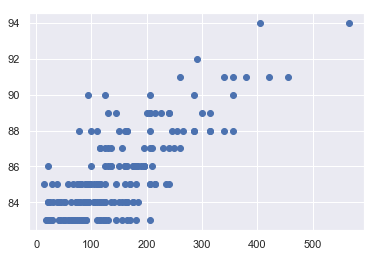

In [4]:
y=raw_data['Wage']
x1=raw_data['Overall']
mp.scatter(y,x1)
mp.show()

In [5]:
#Lets apply linear regression to see how apt the result can be
x=sm.add_constant(x1)
result=sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     278.1
Date:                Fri, 15 Feb 2019   Prob (F-statistic):           1.40e-39
Time:                        00:52:05   Log-Likelihood:                -1099.3
No. Observations:                 200   AIC:                             2203.
Df Residuals:                     198   BIC:                             2209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2363.7144    150.423    -15.714      0.000   -2660.351   -2067.078
Overall       29.3374      1.759     16.676      0.000      25.868      32.807
==============================================================================
Omnibus:                        0.782   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.676   Jarque-Bera (JB):                0.466
Skew:                           0.039   Prob(JB):                        0.792
Kurtosis:                       3.224   Cond. No.                     3.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
new_data=pd.DataFrame({'const':1, 'Overall':[90,94]})
new_data

,Overall,const
0,90,1
1,94,1


In [13]:
prediction=result.predict(new_data)
prediction

0   -212704.959386
1   -222159.817022
dtype: float64

In [ ]:
#Clearly, this is not working